In [1]:
import pandas as pd
import pyreadstat
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# pd.set_option('display.max_columns', None)

### UCLA CHIS Data

2012-2020 predictor column is AB51_P1 <br>
2001 & 2011 does not have column specifying whether participant has TYPE 1 or TYPE 2 diabetes <br>
2003, 2005, 2007, and 2009 predictor column is AB51

In [4]:
chis2003 = pyreadstat.read_sas7bdat("data/chis/2003/adult.sas7bdat")[0]
chis2005 = pyreadstat.read_sas7bdat("data/chis/2005/adult.sas7bdat")[0]
chis2007 = pyreadstat.read_sas7bdat("data/chis/2007/adult.sas7bdat")[0]
chis2009 = pyreadstat.read_sas7bdat("data/chis/2009/adult.sas7bdat")[0]
chis2012 = pyreadstat.read_sas7bdat("data/chis/2012/adult.sas7bdat")[0]
chis2013 = pyreadstat.read_sas7bdat("data/chis/2013/adult.sas7bdat")[0]
chis2014 = pyreadstat.read_sas7bdat("data/chis/2014/adult.sas7bdat")[0]
chis2015 = pyreadstat.read_sas7bdat("data/chis/2015/adult.sas7bdat")[0]
chis2016 = pyreadstat.read_sas7bdat("data/chis/2016/adult.sas7bdat")[0]
chis2017 = pyreadstat.read_sas7bdat("data/chis/2017/adult.sas7bdat")[0]
chis2018 = pyreadstat.read_sas7bdat("data/chis/2018/adult.sas7bdat")[0]
chis2019 = pyreadstat.read_sas7bdat("data/chis/2019/adult.sas7bdat")[0]
chis2020 = pyreadstat.read_sas7bdat("data/chis/2020/adult.sas7bdat")[0]

In [6]:
chis2003 = chis2003.rename({"AB51": "AB51_P1"}, axis=1)
chis2005 = chis2005.rename({"AB51": "AB51_P1"}, axis=1)
chis2007 = chis2007.rename({"AB51": "AB51_P1"}, axis=1)
chis2009 = chis2009.rename({"AB51": "AB51_P1"}, axis=1)

In [7]:
combinedchis = pd.concat([chis2003, chis2005, chis2007, chis2009, chis2012, chis2013, chis2014, chis2015, chis2016, chis2017, chis2018, chis2019, chis2020])
combinedchis

,MAINRSLT,AA5C,AB1,AB17,AB40,AB41,AB19,AH13A,AB18,AB42,...,CV7_9,CV7_10,CV7_11,CV8_1,CV8_2,CV8_4,AK20_P1,AJ174_8,AJ174_9,AJ194_18
0,CA,-1.0,1.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CA,-1.0,2.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CA,2.0,2.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CA,2.0,1.0,1.0,2.0,2.0,-1.0,-1.0,-1.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CA,2.0,1.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21944,NaN,-1.0,2.0,2.0,-1.0,-1.0,NaN,NaN,-1.0,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,4.0,-1.0,-1.0,-1.0
21945,NaN,-1.0,1.0,2.0,-1.0,-1.0,NaN,NaN,-1.0,NaN,...,2.0,2.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
21946,NaN,-1.0,2.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN,...,2.0,1.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
21947,NaN,-1.0,3.0,2.0,-1.0,-1.0,NaN,NaN,-1.0,NaN,...,2.0,1.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


Create new T2D column based on AB51_P1 column

In [8]:
combinedchis["AB51_P1"].value_counts()

-1.0    334902
 2.0     33884
 1.0      3963
 3.0       100
Name: AB51_P1, dtype: int64

In [9]:
combinedchis["T2D"] = combinedchis["AB51_P1"].map(lambda type: 1.0 if type == 2 else 0)
x = combinedchis["T2D"].value_counts()
combinedchis["T2D"].value_counts()

C:\Users\Brian\AppData\Local\Temp/ipykernel_14852/2937682765.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  combinedchis["T2D"] = combinedchis["AB51_P1"].map(lambda type: 1.0 if type == 2 else 0)


0.0    338965
1.0     33884
Name: T2D, dtype: int64

<AxesSubplot:>

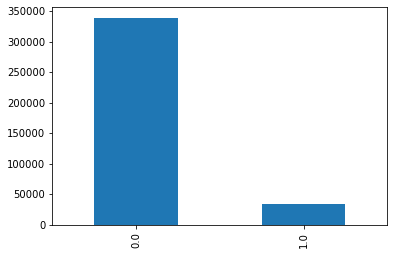

In [10]:
x.plot.bar("T2D")

In [11]:
selected = combinedchis[["AB1", "AB24", "AB29V2", "SMKCUR", "WHOBMI", "AB34", "SMOKING", "OVRWT", "AJ32", "AHEDC_P1", "AG52", "T2D"]]
selected.head(5)

,AB1,AB24,AB29V2,SMKCUR,WHOBMI,AB34,SMOKING,OVRWT,AJ32,AHEDC_P1,AG52,T2D
0,1.0,-1.0,NaN,2.0,NaN,2.0,2.0,1.0,NaN,NaN,NaN,0.0
1,2.0,-1.0,NaN,2.0,NaN,2.0,2.0,2.0,NaN,NaN,NaN,0.0
2,2.0,-1.0,NaN,2.0,NaN,2.0,3.0,2.0,NaN,NaN,NaN,0.0
3,1.0,-1.0,NaN,2.0,NaN,2.0,2.0,1.0,NaN,NaN,NaN,0.0
4,1.0,-1.0,NaN,2.0,NaN,2.0,3.0,1.0,NaN,NaN,NaN,0.0


In [12]:
y = combinedchis["T2D"]
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21944    0.0
21945    0.0
21946    0.0
21947    0.0
21948    0.0
Name: T2D, Length: 372849, dtype: float64

In [13]:
X = combinedchis.drop('T2D', axis=1)
X

,MAINRSLT,AA5C,AB1,AB17,AB40,AB41,AB19,AH13A,AB18,AB42,...,CV7_9,CV7_10,CV7_11,CV8_1,CV8_2,CV8_4,AK20_P1,AJ174_8,AJ174_9,AJ194_18
0,CA,-1.0,1.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CA,-1.0,2.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CA,2.0,2.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CA,2.0,1.0,1.0,2.0,2.0,-1.0,-1.0,-1.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CA,2.0,1.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21944,NaN,-1.0,2.0,2.0,-1.0,-1.0,NaN,NaN,-1.0,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,4.0,-1.0,-1.0,-1.0
21945,NaN,-1.0,1.0,2.0,-1.0,-1.0,NaN,NaN,-1.0,NaN,...,2.0,2.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
21946,NaN,-1.0,2.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN,...,2.0,1.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
21947,NaN,-1.0,3.0,2.0,-1.0,-1.0,NaN,NaN,-1.0,NaN,...,2.0,1.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [14]:
combinedchis["AB51_P1"].value_counts()

-1.0    334902
 2.0     33884
 1.0      3963
 3.0       100
Name: AB51_P1, dtype: int64

# NHIS

In [15]:
nhis2020 = pd.read_csv("data/nhis/2020.csv")

In [16]:
nhis2020

,URBRRL,RATCAT_A,INCGRP_A,INCTCFLG_A,FAMINCTC_A,IMPINCFLG_A,RJWKCLSOFT_A,RJWCLSNOSD_A,RJWRKCLSSD_A,RECJOBSD_A,...,PHSTAT_A,PROXYREL_A,PROXY_A,AVAIL_A,HHSTAT_A,INTV_MON,RECTYPE,WTFA_A,HHX,POVRATTC_A
0,3,14,5,0,100000,0,NaN,NaN,NaN,NaN,...,2,NaN,NaN,1,1,11,10,4526.109,H066706,6.47
1,3,11,4,0,75000,0,NaN,NaN,NaN,NaN,...,2,NaN,NaN,1,1,8,10,12809.039,H034928,3.64
2,3,14,4,0,90000,0,NaN,NaN,NaN,NaN,...,3,NaN,NaN,1,1,8,10,10322.534,H018289,6.76
3,3,11,3,0,65000,0,NaN,NaN,NaN,NaN,...,1,NaN,NaN,1,1,3,10,7743.375,H006876,3.79
4,3,8,1,0,25762,2,NaN,NaN,NaN,NaN,...,3,NaN,NaN,1,1,6,10,4144.724,H028842,2.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31563,4,13,4,0,79000,0,NaN,NaN,NaN,NaN,...,3,NaN,NaN,1,1,2,10,2857.585,H065697,4.61
31564,4,11,3,0,60000,0,NaN,NaN,NaN,NaN,...,3,NaN,NaN,1,1,2,10,2994.763,H061937,3.50
31565,4,8,1,0,27500,0,NaN,NaN,NaN,NaN,...,2,NaN,NaN,1,1,2,10,1328.907,H005331,2.24
31566,4,8,3,0,61880,0,NaN,NaN,NaN,NaN,...,2,NaN,NaN,1,1,2,10,3481.003,H047025,2.38


In [17]:
nhis2020[(nhis2020['DIBTYPE_A'] == 1) | (nhis2020['DIBTYPE_A'] == 2)]

,URBRRL,RATCAT_A,INCGRP_A,INCTCFLG_A,FAMINCTC_A,IMPINCFLG_A,RJWKCLSOFT_A,RJWCLSNOSD_A,RJWRKCLSSD_A,RECJOBSD_A,...,PHSTAT_A,PROXYREL_A,PROXY_A,AVAIL_A,HHSTAT_A,INTV_MON,RECTYPE,WTFA_A,HHX,POVRATTC_A
5,3,9,2,0,36000,0,NaN,NaN,NaN,NaN,...,4,NaN,NaN,1,1,6,10,3164.668,H004811,2.93
10,2,4,1,0,19000,1,NaN,NaN,NaN,NaN,...,5,NaN,NaN,1,1,7,10,13618.549,H058352,1.10
16,4,7,1,0,22000,0,NaN,NaN,NaN,NaN,...,5,NaN,NaN,1,1,2,10,2951.638,H035947,1.79
25,4,7,1,0,30000,0,NaN,NaN,NaN,NaN,...,4,NaN,NaN,1,1,7,10,8818.716,H038142,1.75
28,4,14,5,0,180000,0,NaN,NaN,NaN,NaN,...,3,NaN,NaN,1,1,6,10,14235.743,H043244,10.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31510,4,4,1,0,17500,0,NaN,NaN,NaN,NaN,...,4,NaN,NaN,1,1,9,10,2735.629,H030278,1.02
31513,4,11,3,0,55000,2,NaN,NaN,NaN,NaN,...,3,NaN,NaN,1,1,11,10,1324.040,H041000,3.55
31521,4,14,5,0,113000,0,NaN,NaN,NaN,NaN,...,2,NaN,NaN,1,1,8,10,706.069,H026581,9.21
31541,4,11,2,0,49000,0,NaN,NaN,NaN,NaN,...,3,NaN,NaN,1,1,1,10,1183.631,H038985,3.99
